 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns

%matplotlib inline
from matplotlib import pyplot as plt

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_returns_csv = Path("Resources/whale_returns.csv")

#wrdf.set_index(pd.to_datetime(wrdf['Date'], infer_datetime_format=True), inplace=True)
wrdf = pd.read_csv(whale_returns_csv)
#wrdf = pd.read_csv(whale_returns_csv, index_col="Date", infer_datetime_format=True)
wrdf['Date'] = pd.to_datetime(wrdf['Date'], infer_datetime_format=True)
wrdf.set_index(wrdf['Date'],inplace=True)

In [3]:
wrdf.head()

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,,
2015-03-02,2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [4]:
# Count nulls
wrdf.isna().sum()

Date                           0
SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [5]:
# Drop nulls
del wrdf['Date']
wrdf.dropna(inplace =True)
wrdf.isna().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [6]:
# Reading algorithmic returns
algo_returns_csv = Path("Resources/algo_returns.csv")
# YOUR CODE HERE
ardf = pd.read_csv(algo_returns_csv)
#ardf arpd.read_csv(algo_returns_csv, index_col="Date", infer_datetime_formar=True)
ardf['Date'] = pd.to_datetime(ardf['Date'], infer_datetime_format=True)
ardf.set_index(ardf['Date'],inplace=True)


In [7]:
# Count nulls
# YOUR CODE HERE
ardf.isna().sum()


Date      0
Algo 1    0
Algo 2    6
dtype: int64

In [8]:
# Drop nulls
del ardf['Date']
ardf.dropna(inplace =True)
ardf.isna().sum()



Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [9]:
# Reading S&P 500 Closing Prices, sorting index
sp500_history_csv = Path("Resources/sp500_history.csv")
#spdf = pd.read_csv(sp500_history_csv)
spdf = pd.read_csv(sp500_history_csv, index_col="Date", infer_datetime_format=True,parse_dates=True)
spdf = spdf[::-1]
#spdf.loc['1-Oct-12']
#Date is in different format from others

In [10]:
# Check Data Types
print(f"{spdf.iloc[0][0]} is of type {type(spdf.iloc[0][0])}")
spdf.iloc[0].dtype

$1444.49 is of type <class 'str'>


dtype('O')

In [11]:
# Fix Data Types
# Need to convert 'CLOSE' columns to Floats
# Need to then replace close column with daily returns column
# Need to convert Dates
spdf['Close'] = list(map(lambda item: float(item.strip("$")), spdf['Close']))



In [12]:
#DEBGUG
spdf.to_csv('spdf.csv')

In [13]:
# Calculate Daily Returns
#spdf['Close'] = round(spdf['Close'] - spdf['Close'].shift(1),8)
#spdf['Close'] = spdf['Close'] - spdf['Close'].shift(1)
spdf = (spdf - spdf.shift(1)) / spdf.shift(1)
spdf.head()


,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [14]:
#DEBGUG
spdf.to_csv('spdf-DailyRets.csv')

In [15]:
# Drop nulls

spdf['Close'].dropna(inplace =True)
spdf['Close'].isna().sum()

0

In [16]:
# Rename Column
spdf.rename(columns={'Close':'SP500'},inplace=True)
spdf.dropna(inplace =True)
spdf.head()


,SP500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [17]:
# Concatenate all DataFrames into a single DataFrame
#combined_DF = pd.concat([spdf,ardf,wrdf], axis="columns")
#combined_DF = pd.concat([spdf,ardf,wrdf], axis="columns", join="outer",sort=False)
combined_DF = pd.concat([spdf,wrdf,ardf], axis="columns",join="inner",sort=False)
print(combined_DF.count())
print("\nAfter dropping NaN\n")
combined_DF.dropna(inplace=True)
print(combined_DF.count())


######DEBUG
#combined_DF.to_csv('combined_DF.csv')
############################



SP500                          1043
SOROS FUND MANAGEMENT LLC      1043
PAULSON & CO.INC.              1043
TIGER GLOBAL MANAGEMENT LLC    1043
BERKSHIRE HATHAWAY INC         1043
Algo 1                         1043
Algo 2                         1043
dtype: int64

After dropping NaN

SP500                          1043
SOROS FUND MANAGEMENT LLC      1043
PAULSON & CO.INC.              1043
TIGER GLOBAL MANAGEMENT LLC    1043
BERKSHIRE HATHAWAY INC         1043
Algo 1                         1043
Algo 2                         1043
dtype: int64


# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. 

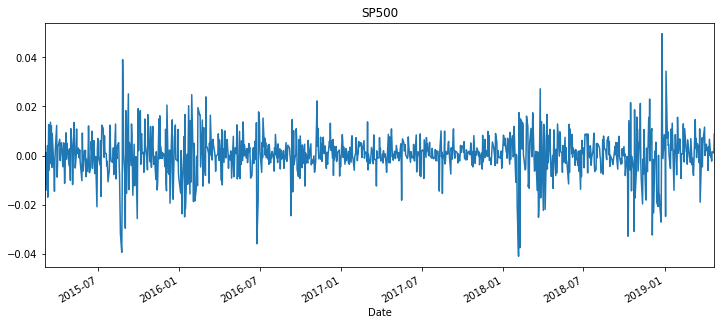

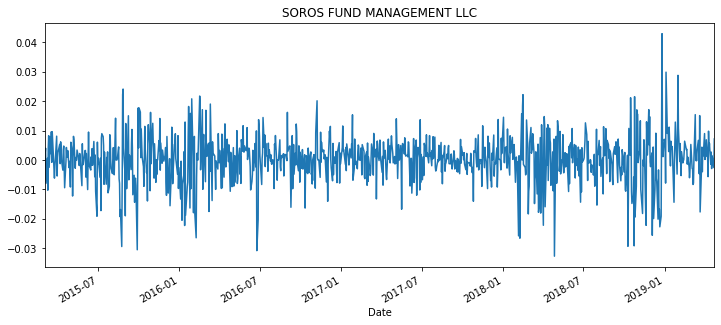

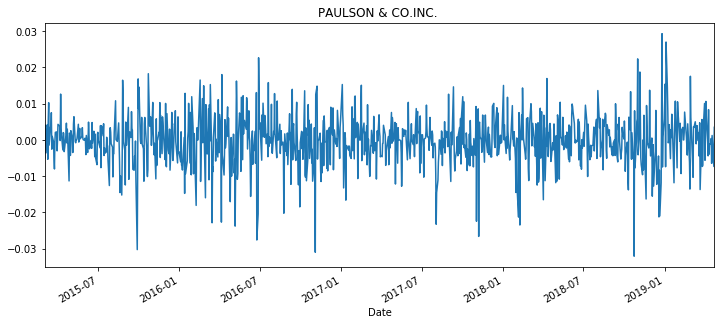

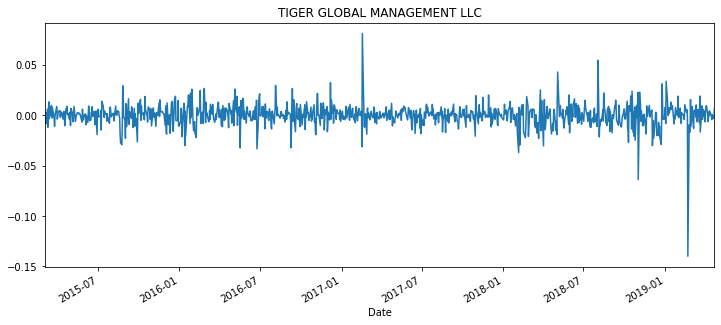

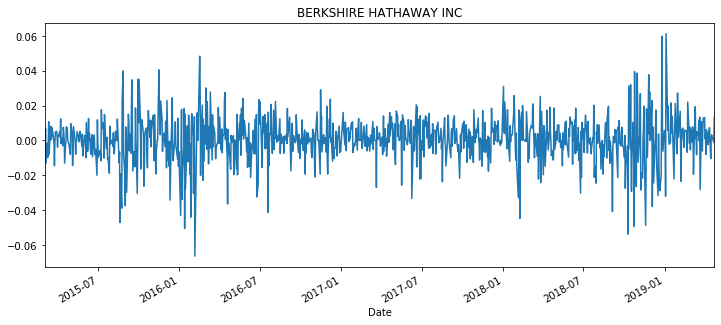

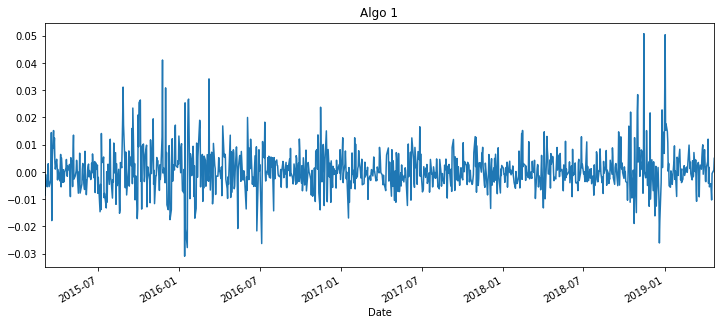

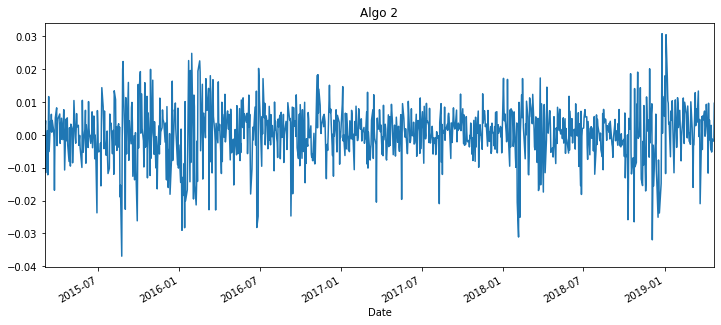

In [18]:
# Plot daily returns

for col in combined_DF.columns:
    currChart = combined_DF[col].plot(figsize=(12,5))
    currChart.set_title(col)
    plt.show()

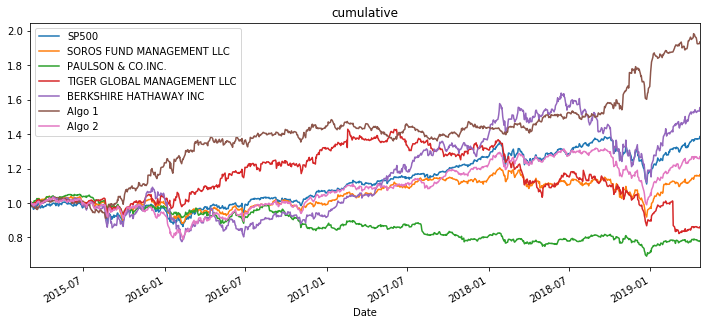

In [42]:
# Plot cumulative returns
#for col in combined_DF.columns:
    #if col != "SP500": # problem with SP500 cumprod() getting error so skipping for now.
currCumulChart  = (1 + combined_DF).cumprod().plot(figsize=(12,5))
currCumulChart.set_title("cumulative")
plt.show()


---

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

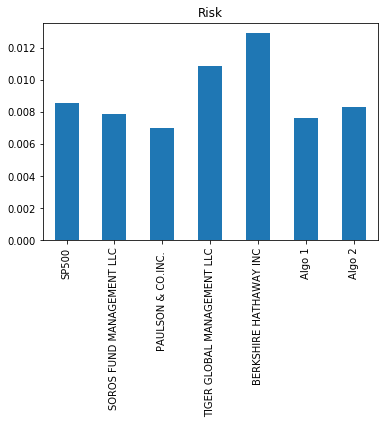

In [20]:
# Box plot to visually show risk
combined_DF.std().plot(kind="bar", title="Risk")
#combined_DF.drop(columns='SP500').std().plot(kind="bar", title="Risk")  #Once fixed will not drop the SP500 column

In [21]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. Which portfolios are riskier than the S&P 500?
dailyCombined_SD = combined_DF.std()
dailyCombined_SD = dailyCombined_SD.sort_values(ascending=False)
print(dailyCombined_SD.head())

BERKSHIRE HATHAWAY INC         0.012919
TIGER GLOBAL MANAGEMENT LLC    0.010894
SP500                          0.008554
Algo 2                         0.008342
SOROS FUND MANAGEMENT LLC      0.007895
dtype: float64


In [22]:
# Determine which portfolios are riskier than the S&P 500
print(f"Highest Risk\Deviation: {dailyCombined_SD.idxmax(axis=1)} with a max of {dailyCombined_SD.max()}")
print(f"Lowest Risk\Deviation: {dailyCombined_SD.idxmin(axis=1)} with a min of {dailyCombined_SD.min()}")




Highest Risk\Deviation: BERKSHIRE HATHAWAY INC with a max of 0.012918618441883524
Lowest Risk\Deviation: PAULSON & CO.INC.  with a min of 0.007023079026076193


In [23]:
# Calculate the annualized standard deviation (252 trading days)


annualized_std = dailyCombined_SD * np.sqrt(252)
annualized_std.head()

BERKSHIRE HATHAWAY INC         0.205077
TIGER GLOBAL MANAGEMENT LLC    0.172936
SP500                          0.135786
Algo 2                         0.132430
SOROS FUND MANAGEMENT LLC      0.125335
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&PP 500 using a 21 day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
2. Calculate and plot a 60 day Beta for Berkshire Hathaway Inc compared to the S&&P 500

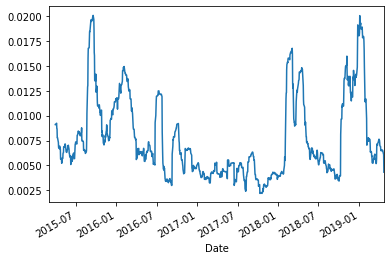

In [24]:
# Calculate and plot the rolling standard deviation for the S&PP 500 using a 21 day window
combined_DF['SP500'].rolling(window=21).std().plot()

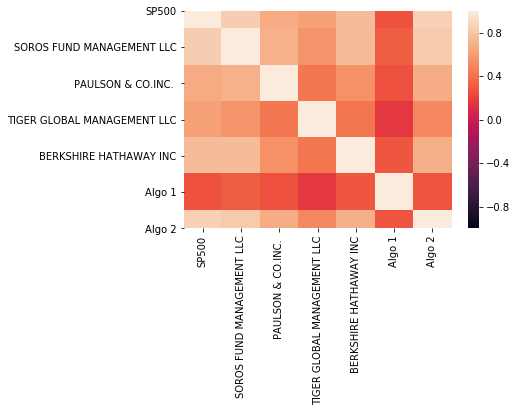

In [25]:
# Correlation
correlation = combined_DF.corr()
correlation
sns.heatmap(correlation, vmin=-1, vmax=1)

In [26]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
covariance = combined_DF['Algo 1'].cov(combined_DF['SP500'])
print(covariance)
variance = combined_DF['SP500'].var()
print(variance)
algo1_beta = covariance / variance
print(algo1_beta)



1.8217749991632843e-05
7.31663242464871e-05
0.24899091459425776


### Challenge: Exponentially Weighted Average 

An alternative way to calculate a rollwing window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the `ewm` with a 21 day half-life.

In [69]:
print(combined_DF.ewm(halflife=21))
print(combined_DF.ewm(halflife=21).mean())

EWM [com=29.799346392775035,min_periods=0,adjust=True,ignore_na=False,axis=0]
               SP500  SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                                  
2015-03-03 -0.004539                  -0.001266           -0.004981   
2015-03-04 -0.004462                   0.000511           -0.000802   
2015-03-05 -0.002514                   0.001718            0.000878   
2015-03-06 -0.005575                  -0.000808           -0.000291   
2015-03-09 -0.003543                  -0.000511            0.000673   
...              ...                        ...                 ...   
2019-04-16  0.001352                   0.001480            0.000448   
2019-04-17  0.001234                   0.001338            0.000223   
2019-04-18  0.001246                   0.001341            0.000256   
2019-04-22  0.001238                   0.001214            0.000009   
2019-04-23  0.001485                   0.001407            0.000122   

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

Calculate and plot the annualized Sharpe ratios for all portfolios to determine which portfolio has the best performance

### Without noting risk, Algo 1 by far.


In [28]:
# Annualzied Sharpe Ratios
sharpe_ratios = (combined_DF.mean() * 252) / (combined_DF.std() * np.sqrt(252))
sharpe_ratios


SP500                          0.648267
SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
dtype: float64

 plot() these sharpe ratios using a barplot.
 On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales?

### Algo1 did have the best return though it is also the highest ricks. Algo 2 has low\moderate risk but is out performed by the SP500. Berkshire is 2nd in returns but its risk remains relatively high. Soros and Algo 2 are the lowest risks with positive returns.

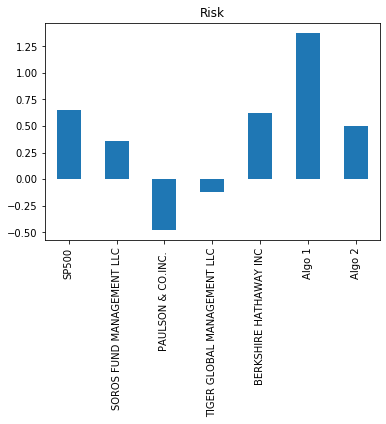

In [29]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Risk")

---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

### BIIB, TSLA, AAPL


In [30]:
# Read the first stock
# Reading whale returns
TSLA_Closing_csv = Path("Resources/TSLA_Closing.csv")
TSLA_Closing = pd.read_csv(TSLA_Closing_csv, index_col="Date", infer_datetime_format=True,parse_dates=True)
#TSLA_Closing['Date'] = pd.to_datetime(TSLA_Closing['Date'], infer_datetime_format=True)
#TSLA_Closing.set_index(TSLA_Closing['Date'],inplace=True)
TSLA_Closing.rename(columns={'Close':'TSLA'},inplace=True)
TSLA_DR = (TSLA_Closing - TSLA_Closing.shift(1)) / TSLA_Closing.shift(1)
TSLA_DR.head()


,TSLA
Date,
2016-01-04,NaN
2016-01-05,0.000090
2016-01-06,-0.019648
2016-01-07,-0.015477
2016-01-08,-0.021563


In [31]:
# Read the second stock
BIIB_Closing_csv = Path("Resources/BIIB_Closing.csv")
BIIB_Closing = pd.read_csv(BIIB_Closing_csv, index_col="Date", infer_datetime_format=True,parse_dates=True)
#BIIB_Closing['Date'] = pd.to_datetime(BIIB_Closing['Date'], infer_datetime_format=True)
#BIIB_Closing.set_index(BIIB_Closing['Date'],inplace=True)
BIIB_Closing.rename(columns={'Close':'BIIB'},inplace=True)
BIIB_DR = (BIIB_Closing - BIIB_Closing.shift(1)) / BIIB_Closing.shift(1)
BIIB_DR.head()

,BIIB
Date,
2016-01-04,NaN
2016-01-05,0.007075
2016-01-06,-0.010172
2016-01-07,-0.032938
2016-01-08,-0.012041


In [32]:
# Read the third stock
AAPL_Closing_csv = Path("Resources/AAPL_Closing.csv")
AAPL_Closing = pd.read_csv(AAPL_Closing_csv, index_col="Date", infer_datetime_format=True,parse_dates=True)
#AAPL_Closing['Date'] = pd.to_datetime(AAPL_Closing['Date'], infer_datetime_format=True)
#AAPL_Closing.set_index(AAPL_Closing['Date'],inplace=True)
AAPL_Closing.rename(columns={'Close':'AAPL'},inplace=True)
AAPL_DR = (AAPL_Closing - AAPL_Closing.shift(1)) / AAPL_Closing.shift(1)
AAPL_DR.head()

,AAPL
Date,
2016-01-04,NaN
2016-01-05,-0.025059
2016-01-06,-0.019570
2016-01-07,-0.042205
2016-01-08,0.005288


In [33]:
# Concatenate all stocks into a single DataFrame
custCombined_DF = pd.concat([AAPL_Closing,BIIB_Closing,TSLA_Closing], axis="columns",join="inner",sort=False)
custCombined_DF.dropna(inplace=True)
print(custCombined_DF.count())


AAPL    252
BIIB    252
TSLA    252
dtype: int64


In [34]:
# Reset the index
# should be ok without. all frames combined and use 1 index

In [35]:
# Drop Nulls
custCombined_DF.dropna(inplace=True)


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [36]:
# Calculate weighted portfolio returns
weights = [1/3, 1/3, 1/3]

CustCombined_returns = custCombined_DF.dot(weights)
CustCombined_returns.head()


Date
2016-01-04    200.043333
2016-01-05    199.810000
2016-01-06    196.750000
2016-01-07    191.233333
2016-01-08    188.803333
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [37]:
great_DF = pd.concat([custCombined_DF,combined_DF], axis="columns",join="inner",sort=False)
great_DF.head()

,AAPL,BIIB,TSLA,SP500,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2
Date,,,,,,,,,,
2016-01-04,105.35,271.37,223.41,-0.015304,-0.013263,-0.006037,-0.006017,-0.043190,-0.000307,-0.014485
2016-01-05,102.71,273.29,223.43,0.002012,-0.000398,0.002242,0.006798,-0.002960,0.009160,0.001770
2016-01-06,100.70,270.51,219.04,-0.013115,-0.011558,-0.006955,-0.003349,0.017758,0.010346,-0.015503
2016-01-07,96.45,261.60,215.65,-0.023700,-0.020495,-0.007167,-0.021324,-0.033944,-0.000081,-0.029061
2016-01-08,96.96,258.45,211.00,-0.010838,-0.008149,-0.008307,-0.010071,-0.017585,-0.006897,-0.012941


In [38]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
great_DF.dropna(inplace=True)
great_DF.head()

,AAPL,BIIB,TSLA,SP500,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2
Date,,,,,,,,,,
2016-01-04,105.35,271.37,223.41,-0.015304,-0.013263,-0.006037,-0.006017,-0.043190,-0.000307,-0.014485
2016-01-05,102.71,273.29,223.43,0.002012,-0.000398,0.002242,0.006798,-0.002960,0.009160,0.001770
2016-01-06,100.70,270.51,219.04,-0.013115,-0.011558,-0.006955,-0.003349,0.017758,0.010346,-0.015503
2016-01-07,96.45,261.60,215.65,-0.023700,-0.020495,-0.007167,-0.021324,-0.033944,-0.000081,-0.029061
2016-01-08,96.96,258.45,211.00,-0.010838,-0.008149,-0.008307,-0.010071,-0.017585,-0.006897,-0.012941


## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

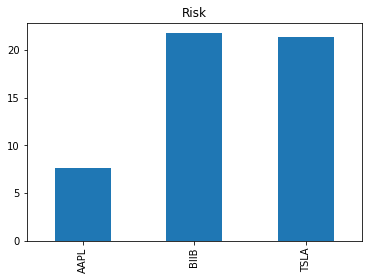

In [55]:
# Risk
custCombined_DF.std().plot(kind="bar", title="Risk")
#combined_DF.std().plot(kind="bar", title="Risk")


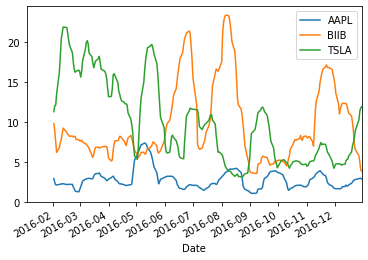

In [40]:
# Rolling
custCombined_DF.rolling(window=21).std().plot()

In [45]:
# Beta
covariance02 = custCombined_DF['AAPL'].cov(combined_DF['SP500'])
print(covariance02)
variance02 = combined_DF['SP500'].var()
print(variance02)
AAPL_beta = covariance02 / variance02
print(AAPL_beta)


0.0034398973975333204
7.31663242464871e-05
47.01476304788508


In [57]:
# Annualzied Sharpe Ratios
sharpe_ratios02 = (great_DF.mean() * 252) / (great_DF.std() * np.sqrt(252))
sharpe_ratios02

AAPL                           217.326651
BIIB                           188.103619
TSLA                           155.827504
SP500                            0.760945
SOROS FUND MANAGEMENT LLC        0.007946
PAULSON & CO.INC.               -0.903469
TIGER GLOBAL MANAGEMENT LLC      1.583984
BERKSHIRE HATHAWAY INC          -0.433895
Algo 1                           1.244525
Algo 2                           0.778177
dtype: float64

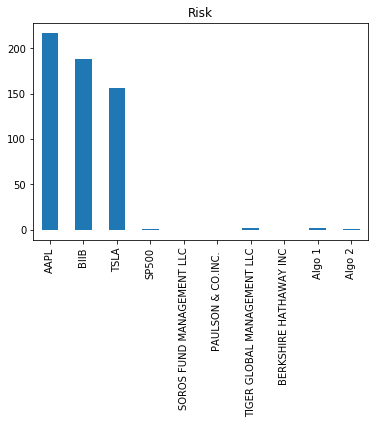

In [58]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios02.plot(kind="bar", title="Risk")

#All 3 of the choosen stocks are many times more risky then the given. The deviations are very large comparatively.

## Include correlation analysis to determine which stocks (if any) are correlated

### -Algo 2 seems to have the highest correlations with the SP500 as well as the Soros Fund.
### -Tsla seems to have the lowest( smallest absolute value) correlation in relation to the SP500.



                                 AAPL      BIIB      TSLA     SP500  \
AAPL                         1.000000  0.630513  0.066700  0.054576   
BIIB                         0.630513  1.000000 -0.030859  0.006093   
TSLA                         0.066700 -0.030859  1.000000 -0.003112   
SP500                        0.054576  0.006093 -0.003112  1.000000   
SOROS FUND MANAGEMENT LLC    0.045606  0.055105  0.020079  0.873372   
PAULSON & CO.INC.           -0.020542  0.014594  0.035186  0.613819   
TIGER GLOBAL MANAGEMENT LLC  0.011091 -0.003388  0.012978  0.701187   
BERKSHIRE HATHAWAY INC       0.088621  0.059752  0.027915  0.685291   
Algo 1                      -0.012772  0.026433 -0.025559  0.302798   
Algo 2                       0.057917  0.047543  0.016549  0.868211   

                             SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
AAPL                                          0.045606           -0.020542   
BIIB                                          0.055105        

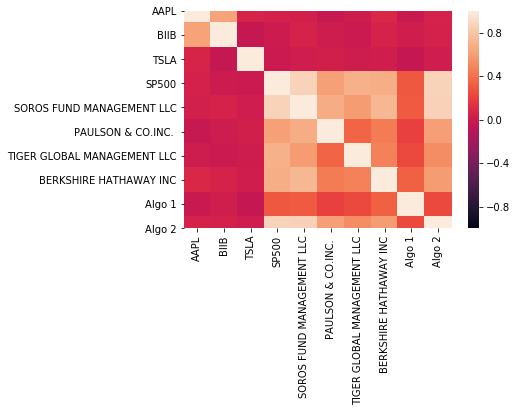

In [60]:
correlation02 = great_DF.corr()
print(correlation02)
sns.heatmap(correlation02, vmin=-1, vmax=1)